Load data and import libraries

In [1]:
import pandas as pd
from helpers.data_preprocessing import DataProcesser

data = pd.read_csv("./../../data/train_set_0520.csv", usecols=['comment', 'non-information'])

comments = data['comment'].apply(str)

### Preprocess data:
1. remove java tags
2. remove all special characters and accents
3. turn all characters into lower case
4. stemming --> put the word into its most basic form

In [2]:
dp = DataProcesser()

comments = comments.apply(dp.preprocess)

comments.head()



0    implnot taken from link com sun javafx scene c...
1          icon settooltiptext printedviewmodel getloc
2    synchron chang of the underli date valu with t...
3    ask if the user realli want to close the given...
4                                           css inform
Name: comment, dtype: object

Split words and put them into a list

In [3]:
split_comments = " ".join(comments)
split_comments = split_comments.split()
split_comments[0:15]

['implnot',
 'taken',
 'from',
 'link',
 'com',
 'sun',
 'javafx',
 'scene',
 'control',
 'behavior',
 'textareabehavior',
 'contextmenurequest',
 'javafx',
 'scene',
 'input']

count word frequency

In [4]:
from collections import Counter
counted_comments = Counter(split_comments)
{k: counted_comments[k] for k in list(counted_comments)[:15]}

{'implnot': 2,
 'taken': 10,
 'from': 105,
 'link': 161,
 'com': 21,
 'sun': 2,
 'javafx': 28,
 'scene': 6,
 'control': 11,
 'behavior': 1,
 'textareabehavior': 1,
 'contextmenurequest': 1,
 'input': 9,
 'contextmenuev': 1,
 'icon': 34}

15 most common words

In [5]:
most_occur = counted_comments.most_common(15)
most_occur


[('the', 1464),
 ('to', 589),
 ('a', 461),
 ('is', 354),
 ('of', 330),
 ('thi', 319),
 ('in', 281),
 ('and', 275),
 ('if', 263),
 ('for', 259),
 ('entri', 227),
 ('file', 210),
 ('it', 209),
 ('be', 185),
 ('link', 161)]

most common words after removing stopwords

In [6]:
from helpers.textual_analysis import *

counted_comments = get_most_common_words(comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 1464),
 ('to', 589),
 ('a', 461),
 ('is', 354),
 ('of', 330),
 ('thi', 319),
 ('in', 281),
 ('and', 275),
 ('if', 263),
 ('for', 259),
 ('entri', 227),
 ('file', 210),
 ('it', 209),
 ('be', 185),
 ('link', 161)]

Word Cloud

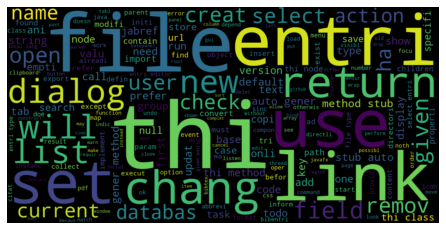

In [7]:
create_word_cloud(comments)

Non-information 'yes' comments

In [8]:
bad_comments = data[data['non-information'] == 'yes']
bad_comments = bad_comments['comment'].apply(str)

dp = DataProcesser()

bad_comments = bad_comments.apply(dp.preprocess)

bad_comments[:15]

0     implnot taken from link com sun javafx scene c...
1           icon settooltiptext printedviewmodel getloc
3     ask if the user realli want to close the given...
6                                       each entri type
9               final add thing to the current open tab
16                                        db file exist
19                      dir must be a folder not a file
22                                                 save
40                                clear the current log
42                                     revert the chang
45      get the search describ for a given search queri
48              return the hashmap contain all key bind
52              add the given entri to thi node s group
54                                              default
55                                      bug report bodi
Name: comment, dtype: object

What words are most common among the non-information 'yes' comments?

In [9]:
counted_comments = get_most_common_words(bad_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 154),
 ('gener', 58),
 ('method', 57),
 ('auto', 57),
 ('stub', 54),
 ('to', 44),
 ('a', 43),
 ('entri', 40),
 ('if', 38),
 ('for', 33),
 ('of', 29),
 ('return', 28),
 ('file', 26),
 ('given', 23),
 ('and', 23)]

Word Cloud of non-information 'yes' comments

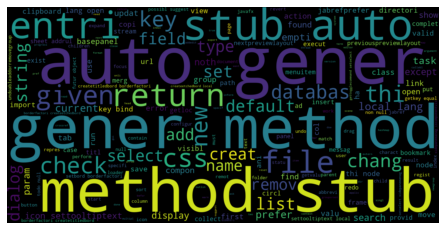

In [10]:
# Generate a word cloud image
create_word_cloud(bad_comments)

Non-information 'no' comments

In [11]:
data.head()
good_comments = data[data['non-information'] == 'no']
good_comments = good_comments['comment'].apply(str)

#clean data
dp = DataProcesser()

good_comments = good_comments.apply(dp.preprocess)

good_comments.head()

2    synchron chang of the underli date valu with t...
4                                           css inform
5    check if there is a default type with the same...
7    todo usernam domain and ident should be includ...
8    alreadi pars via command line paramet e g jabr...
Name: comment, dtype: object

What words are most common among the non-information 'no' comments?

In [12]:
counted_comments = get_most_common_words(good_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('the', 1310),
 ('to', 545),
 ('a', 418),
 ('is', 339),
 ('of', 301),
 ('thi', 297),
 ('in', 268),
 ('and', 252),
 ('for', 226),
 ('if', 225),
 ('it', 195),
 ('entri', 187),
 ('file', 184),
 ('be', 176),
 ('link', 155)]

Non-information 'no' comments

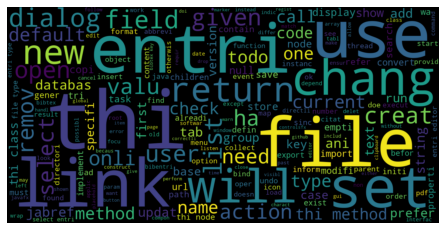

In [13]:
# Generate a word cloud image
create_word_cloud(good_comments)


Remove stopwords from comments

In [14]:
dp = DataProcesser()
comments = comments.apply(lambda x: dp.remove_stopwords(x))
comments.head()

0    implnot taken link com sun javafx scene contro...
1          icon settooltiptext printedviewmodel getloc
2    synchron chang underli date valu temporalacces...
3             ask user realli want close given databas
4                                           css inform
Name: comment, dtype: object

Most frequent words, removed stopwords

In [15]:
counted_comments = get_most_common_words(comments)
most_occur = counted_comments.most_common(15)
most_occur

[('thi', 319),
 ('entri', 227),
 ('file', 210),
 ('link', 161),
 ('method', 148),
 ('use', 139),
 ('return', 112),
 ('new', 111),
 ('set', 110),
 ('chang', 103),
 ('type', 97),
 ('dialog', 95),
 ('field', 92),
 ('given', 91),
 ('string', 86)]

Most frequent words- non-information 'yes', removed stopwords

In [16]:
bad_comments = bad_comments.apply(lambda x: dp.remove_stopwords(x))
counted_comments = get_most_common_words(bad_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('gener', 58),
 ('method', 57),
 ('auto', 57),
 ('stub', 54),
 ('entri', 40),
 ('return', 28),
 ('file', 26),
 ('given', 23),
 ('thi', 22),
 ('css', 22),
 ('key', 20),
 ('check', 17),
 ('new', 17),
 ('databas', 14),
 ('chang', 13)]

Most frequent words- non-information 'no', removed stopwords

In [17]:
good_comments = good_comments.map(lambda x: dp.remove_stopwords(x))
counted_comments = get_most_common_words(good_comments)
most_occur = counted_comments.most_common(15)
most_occur

[('thi', 297),
 ('entri', 187),
 ('file', 184),
 ('link', 155),
 ('use', 133),
 ('set', 97),
 ('new', 94),
 ('method', 91),
 ('chang', 90),
 ('type', 85),
 ('return', 84),
 ('dialog', 83),
 ('field', 80),
 ('string', 73),
 ('select', 71)]